#### Prediction of store sales - Task 2

Preprocessing

In [1]:
# importing necessary libraries
import pandas as pd

In [2]:
# load datasets

train_df = pd.read_csv('../data/train1.csv', low_memory=False)
test_df = pd.read_csv('../data/test1.csv', low_memory=False)
store_df = pd.read_csv('../data/store.csv',low_memory=False)


In [5]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,4,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,4,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,4,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,4,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [7]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,3,2015-09-17,1.0,1,0,0
1,2,3,3,2015-09-17,1.0,1,0,0
2,3,7,3,2015-09-17,1.0,1,0,0
3,4,8,3,2015-09-17,1.0,1,0,0
4,5,9,3,2015-09-17,1.0,1,0,0


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41088 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


check null values

In [9]:
train_df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [10]:
test_df.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [11]:
# convert date type from object to datetime type
train_df.Date = pd.to_datetime(train_df["Date"])
test_df.Date=pd.to_datetime(test_df["Date"])

In [12]:
# merge
test_df = pd.merge(test_df, store_df, how= 'inner', on='Store')

In [13]:
test_df.isnull().sum()

Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                             0
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
dtype: int64

For stores without recorded competition data, assume no competition was active. Replace missing values in the 

CompetitionOpenSinceYear and CompetitionOpenSinceMonth columns with 0 to indicate the absence of competition.

In [14]:
test_df['Promo2SinceWeek'] = test_df['Promo2SinceWeek'].fillna(0)
test_df['Promo2SinceYear'] = test_df['Promo2SinceYear'].fillna(0)
test_df['PromoInterval'] = test_df['PromoInterval'].fillna(0)

For stores without recorded competition data, assume no competition was active. Replace missing values in the 

CompetitionOpenSinceYear and CompetitionOpenSinceMonth columns with 0 to indicate the absence of competition.

In [15]:
test_df['CompetitionOpenSinceYear'] = test_df['CompetitionOpenSinceYear'].fillna(0)
test_df['CompetitionOpenSinceMonth'] = test_df['CompetitionOpenSinceMonth'].fillna(0)

When competition distance data is missing, interpret it as an unknown distance rather than a lack of competitors. 

Replace missing values in the CompetitionDistance column with the median distance to ensure a representative value.

In [16]:
median_distance = test_df['CompetitionDistance'].median()
test_df['CompetitionDistance'] = test_df['CompetitionDistance'].fillna(median_distance)

In [17]:
test_df.isnull().sum()

Id                           0
Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Extract features from Date Column

In [18]:
def extract_date_features(df):
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)
    df['DayOfMonth'] = df['Date'].dt.day
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week
    df['Season'] = pd.cut(df['Month'], 
                          bins=[0, 3, 6, 9, 12], 
                          labels=['Winter', 'Spring', 'Summer', 'Fall'],
                          include_lowest=True)
    return df

In [19]:
extract_date_features(train_df)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,IsWeekend,DayOfMonth,WeekOfYear,Season
0,1,4,2015-07-31,5263,555,1,1,0,1,c,...,0.0,0.0,0,2015,7,31,0,31,31,Summer
1,2,4,2015-07-31,6064,625,1,1,0,1,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,0,31,31,Summer
2,3,4,2015-07-31,8314,821,1,1,0,1,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,0,31,31,Summer
3,4,4,2015-07-31,13995,1498,1,1,0,1,c,...,0.0,0.0,0,2015,7,31,0,31,31,Summer
4,5,4,2015-07-31,4822,559,1,1,0,1,a,...,0.0,0.0,0,2015,7,31,0,31,31,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,1,2013-01-01,0,0,0,0,a,1,a,...,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,0,1,1,Winter
1017205,1112,1,2013-01-01,0,0,0,0,a,1,c,...,0.0,0.0,0,2013,1,1,0,1,1,Winter
1017206,1113,1,2013-01-01,0,0,0,0,a,1,a,...,0.0,0.0,0,2013,1,1,0,1,1,Winter
1017207,1114,1,2013-01-01,0,0,0,0,a,1,a,...,0.0,0.0,0,2013,1,1,0,1,1,Winter


In [20]:
extract_date_features(test_df)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,IsWeekend,DayOfMonth,WeekOfYear,Season
0,1,1,3,2015-09-17,1.0,1,0,0,c,a,...,0.0,0.0,0,2015,9,17,0,17,38,Summer
1,2,3,3,2015-09-17,1.0,1,0,0,a,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,0,17,38,Summer
2,3,7,3,2015-09-17,1.0,1,0,0,a,c,...,0.0,0.0,0,2015,9,17,0,17,38,Summer
3,4,8,3,2015-09-17,1.0,1,0,0,a,a,...,0.0,0.0,0,2015,9,17,0,17,38,Summer
4,5,9,3,2015-09-17,1.0,1,0,0,a,c,...,0.0,0.0,0,2015,9,17,0,17,38,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,5,2015-08-01,1.0,0,0,0,a,a,...,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,8,1,1,1,31,Summer
41084,41085,1112,5,2015-08-01,1.0,0,0,0,c,c,...,0.0,0.0,0,2015,8,1,1,1,31,Summer
41085,41086,1113,5,2015-08-01,1.0,0,0,0,a,c,...,0.0,0.0,0,2015,8,1,1,1,31,Summer
41086,41087,1114,5,2015-08-01,1.0,0,0,0,a,c,...,0.0,0.0,0,2015,8,1,1,1,31,Summer


In [23]:
# Create and fit the preprocessing pipeline
preprocessor = create_preprocessing_pipeline()
X_train = train_df.drop(['Sales', 'Customers', 'Date'], axis=1)

In [24]:
X_train

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,IsWeekend,DayOfMonth,WeekOfYear,Season
0,1,4,1,1,0,1,c,a,1270.0,9.0,...,0.0,0.0,0,2015,7,31,0,31,31,Summer
1,2,4,1,1,0,1,a,a,570.0,11.0,...,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,0,31,31,Summer
2,3,4,1,1,0,1,a,a,14130.0,12.0,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,0,31,31,Summer
3,4,4,1,1,0,1,c,c,620.0,9.0,...,0.0,0.0,0,2015,7,31,0,31,31,Summer
4,5,4,1,1,0,1,a,a,29910.0,4.0,...,0.0,0.0,0,2015,7,31,0,31,31,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,1,0,0,a,1,a,a,1900.0,6.0,...,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,0,1,1,Winter
1017205,1112,1,0,0,a,1,c,c,1880.0,4.0,...,0.0,0.0,0,2013,1,1,0,1,1,Winter
1017206,1113,1,0,0,a,1,a,c,9260.0,0.0,...,0.0,0.0,0,2013,1,1,0,1,1,Winter
1017207,1114,1,0,0,a,1,a,c,870.0,0.0,...,0.0,0.0,0,2013,1,1,0,1,1,Winter


In [25]:
X_test = test_df.drop(['Id', 'Date'], axis=1)

In [26]:
preprocessor.fit(train_df)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Store', 'DayOfWeek', 'DayOfMonth',
                                  'WeekOfYear', 'Year', 'Month',
                                  'CompetitionDistance',
                                  'CompetitionOpenSinceMonth',
                                  'CompetitionOpenSinceYear', 'Promo2SinceWeek',
                                  'Promo2SinceYear']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['StoreType', 'Assortment', 'StateHoliday',
                                  'SchoolHoliday', 'Season', 'Promo',
                                  'Promo2'])])

In [27]:
X_train_processed = preprocessor.transform(train_df)
X_test_processed = preprocessor.transform(train_df)

In [28]:
print(X_train_processed)
print(X_test_processed)

[[-1.73164032  0.50148416  1.74076566 ...  1.          1.
   0.        ]
 [-1.72853385  0.50148416  1.74076566 ...  1.          0.
   1.        ]
 [-1.72542738  0.50148416  1.74076566 ...  1.          0.
   1.        ]
 ...
 [ 1.72275751 -1.00047591 -1.67312281 ...  0.          1.
   0.        ]
 [ 1.72586398 -1.00047591 -1.67312281 ...  0.          1.
   0.        ]
 [ 1.72897045 -1.00047591 -1.67312281 ...  0.          0.
   1.        ]]
[[-1.73164032  0.50148416  1.74076566 ...  1.          1.
   0.        ]
 [-1.72853385  0.50148416  1.74076566 ...  1.          0.
   1.        ]
 [-1.72542738  0.50148416  1.74076566 ...  1.          0.
   1.        ]
 ...
 [ 1.72275751 -1.00047591 -1.67312281 ...  0.          1.
   0.        ]
 [ 1.72586398 -1.00047591 -1.67312281 ...  0.          1.
   0.        ]
 [ 1.72897045 -1.00047591 -1.67312281 ...  0.          0.
   1.        ]]


In [29]:
y_train = train_df['Sales']

Building models with sklearn pipelines

In [30]:
# Assign the preprocessed data
X_train, X_test, y_train = X_train_processed,X_test_processed,y_train

In [31]:
# Split the training data further for evaluation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [33]:
# Build the model
model = build_model()

In [35]:
# Train the model with training data
trained_model = train_model(model, X_train, y_train)

Model Evaluation

In [38]:
# Evaluate the model
mse, mae, rmse, r2, msle = evaluate_model(trained_model, X_val, y_val)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")
print(f"MSLE: {msle}")

MSE: 823698.0139255588
MAE: 510.6021401312579
RMSE: 907.5781034850713
R2: 0.9443025649721308
MSLE: 0.27115472078233194


Feature Importance Analysis

In [41]:
feature_importance = get_feature_importance(trained_model, preprocessor)

                      feature  importance
1                   DayOfWeek    0.389526
6         CompetitionDistance    0.110915
18             StateHoliday_0    0.090211
0                       Store    0.088667
8    CompetitionOpenSinceYear    0.043173
29                    Promo_1    0.038554
28                    Promo_0    0.037806
7   CompetitionOpenSinceMonth    0.034302
12                StoreType_b    0.033548
10            Promo2SinceYear    0.021597


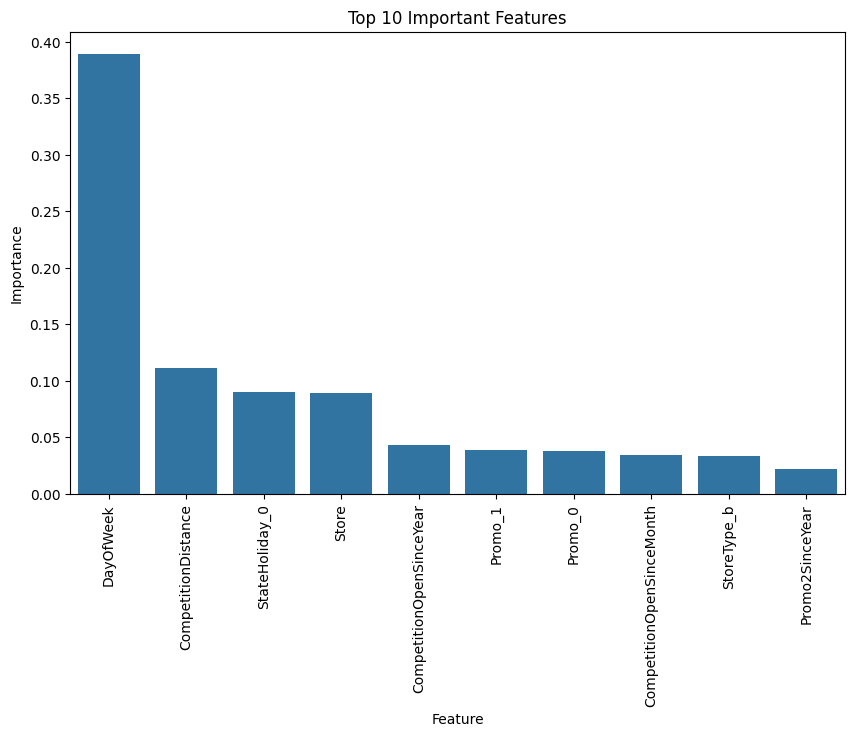

In [49]:
# Plot the top 10 important features
top_features = feature_importance.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y="importance", x="feature", data=top_features)
plt.title("Top 10 Important Features")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.xticks(rotation=90)  # Rotate x labels by 90 degrees
plt.show()

Confidence Interval

In [50]:
# Confidence Interval
y_pred = trained_model.predict(X_val)
lower_ci, upper_ci = calculate_confidence_interval(y_pred)
print(f"95% Confidence Interval: ({lower_ci}, {upper_ci})")

95% Confidence Interval: ([5769.65230225], [5773.70128771])


Serialize models

In [53]:
# Serialize the model
model_path='../models'
model_filename = serialize_model(trained_model, model_path)
print(f"The ML Model saved as: {model_filename}")

The ML Model saved as: model_25-09-2024-13-07-08-459997.pkl
